<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Задачи**


Загрузите два датасета user_data и logs.


Какой клиент совершил больше всего успешных операций? (success == True)


С какой платформы осуществляется наибольшее количество успешных операций?


Какую платформу предпочитают премиумные клиенты?


Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)


Постройте график распределения числа успешных операций


Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [14]:
# Описание данных
# user_data:

# client – идентификатор пользователя
# premium – является ли клиент премиум
# age – возраст
# logs:

# client – идентификатор пользователя
# success – результат (успех - 1, нет - 0)
# platform – платформа
# time – время в формате Unix

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('3_logs.csv')
data_2 = pd.read_csv('3_user_data.csv')
data = data.merge(data_2, on='client')
data

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3439 entries, 0 to 3438
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    3439 non-null   int64 
 1   success   3439 non-null   bool  
 2   platform  3439 non-null   object
 3   time      3439 non-null   int64 
 4   premium   3439 non-null   bool  
 5   age       3439 non-null   int64 
dtypes: bool(2), int64(3), object(1)
memory usage: 141.1+ KB


In [18]:
data.shape

(3439, 6)

In [19]:
#количество пропущенных значений
data.isna().sum()

client      0
success     0
platform    0
time        0
premium     0
age         0
dtype: int64

In [20]:
#Сколько уникальных значений принимает переменная platform
data.value_counts('platform')

platform
phone       2117
computer    1140
tablet       182
dtype: int64

In [21]:
# Какой клиент совершил больше всего успешных операций?
# Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client)
# через запятую и пробел в порядке возрастания.
# Отберите успешные операции с помощью query, проведите группировку по клиентам, и посчитайте для каждого клиента
# число успешных операций с помощью count.
# Далее найдите максимальное значение и отберите всех клиентов с таким числом операций.
# После этого отсортируйте их id по возрастанию

#client_action = data.query('success == 1') \
#     .groupby('client', as_index = False) \
#     .agg({'success' : 'count'})

client_action = data.query('success == 1') \
     .groupby('client', as_index = False) \
     .agg({'success' : 'count'}) \
    .sort_values('success', ascending = False) \
    .query('success == 41') \
    .sort_values('client') 

client_action

,client,success
250,12179,41
588,28719,41
737,36165,41
1084,52870,41
1279,61468,41
1280,61473,41
1636,78349,41
1716,82563,41
1933,92584,41


In [22]:
# С какой платформы осуществляется наибольшее количество успешных операций

data.groupby('platform') \
    .agg({'client' : 'count'}) \
    .idxmax()


client    phone
dtype: object

In [23]:
# Какая платформа наиболее популярна среди премиумных клиентов?
data

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [24]:
premium_client = data.query('premium == True') \
    .groupby('platform', as_index=False) \
    .agg({'client' : 'count'})

premium_client

,platform,client
0,computer,150
1,phone,246
2,tablet,24


C:\Users\1612918\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\1612918\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

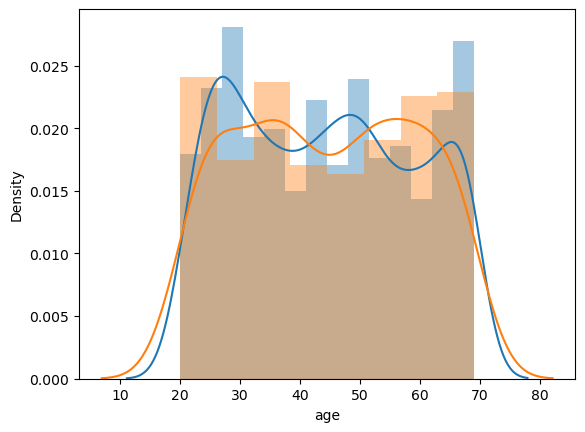

In [25]:
#Визуализируйте распределение возраста клиентов в зависимости от типа клиента (обычный или премиум),
# используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

#Используйте датасет, который вы получили на предыдущем шаге



not_premium = data.query('premium == False')
sns.distplot(not_premium.age)

premium = data.query('premium == True')
sns.distplot(premium.age)

C:\Users\1612918\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count_success_operation', ylabel='Density'>

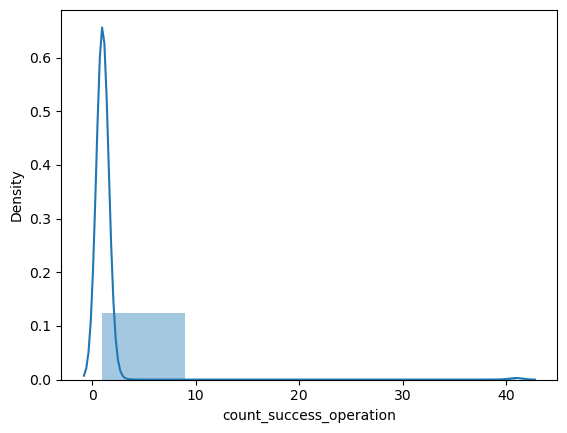

In [26]:
# Постройте график распределения числа успешных операций: 
# x – число успешных операций
# Сгруппируйте данные по клиентам и посчитайте число успешных операций.
# Далее постройте гистограмму распределения этой величины с помощью sns.distplot

success = data.query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'platform' : 'count'}) \
    .rename(columns = {'platform' : 'count_success_operation'}) \
    .sort_values('count_success_operation', ascending = False)

sns.distplot(success.count_success_operation, bins = 5)

# Выводы:
# Несколько клиентов совершили более 40 успешных действий
# Бóльшая часть наблюдений сосредоточена в левой части графика

In [27]:
data

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [28]:
# Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot.
# По оси x – возраст, y – число успешных операций.
# Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

C:\Users\1612918\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

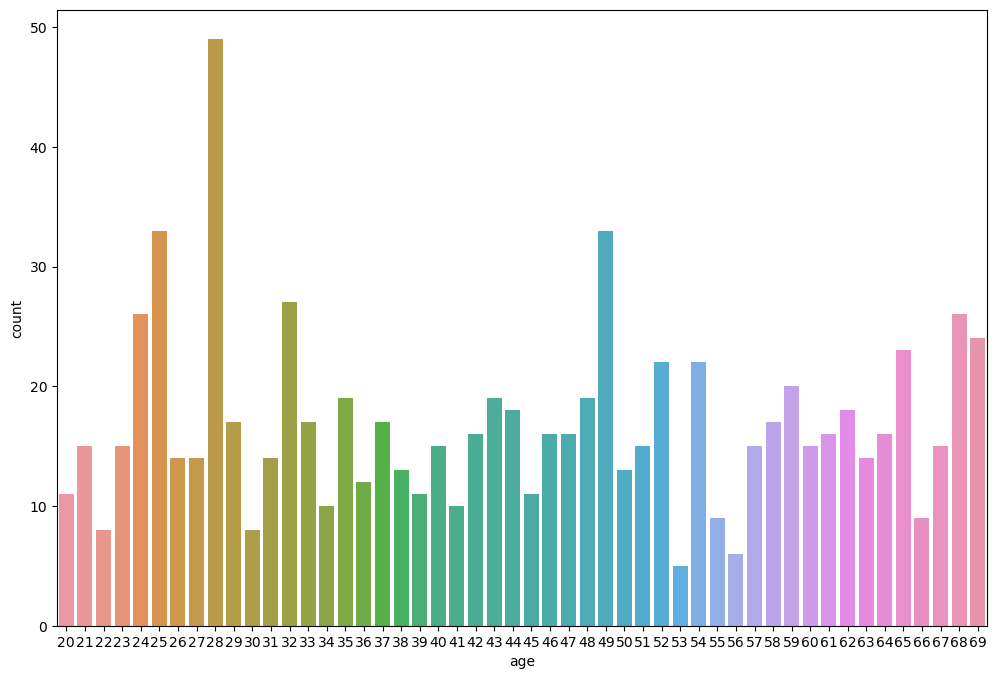

In [29]:
age_and_computer = data.query('platform == "computer" and success == True')
plt.figure(figsize=(12, 8))
sns.countplot(age_and_computer.age)